In [1]:
from functions.norms import *
from visualization.line_graph import *
from api.GlassnodeAPI import GlassnodeAPI

In [2]:
def market_to_realized_cap_moving_L_k_norm(df, step=60, k=2):
    aux = moving_L_k_norm(df['price'],df['realized price'],k,step)
    fig, ax1, ax2 = with_price_in_background(df['time'][step:],df['price'][step:])
    ax1.set_ylabel(f'L_{k} norm',color='blue', fontsize=40)
    ax1.tick_params(axis='y', labelcolor='blue', labelsize=40)
    ax1.plot(df['time'][step:],aux,color='blue')
    plt.show()

In [3]:
glassnode_api_key = open("/home/malimi/Skillset/glassnode_api_key.txt",'r').read()[:-1]
g = GlassnodeAPI(key=glassnode_api_key)

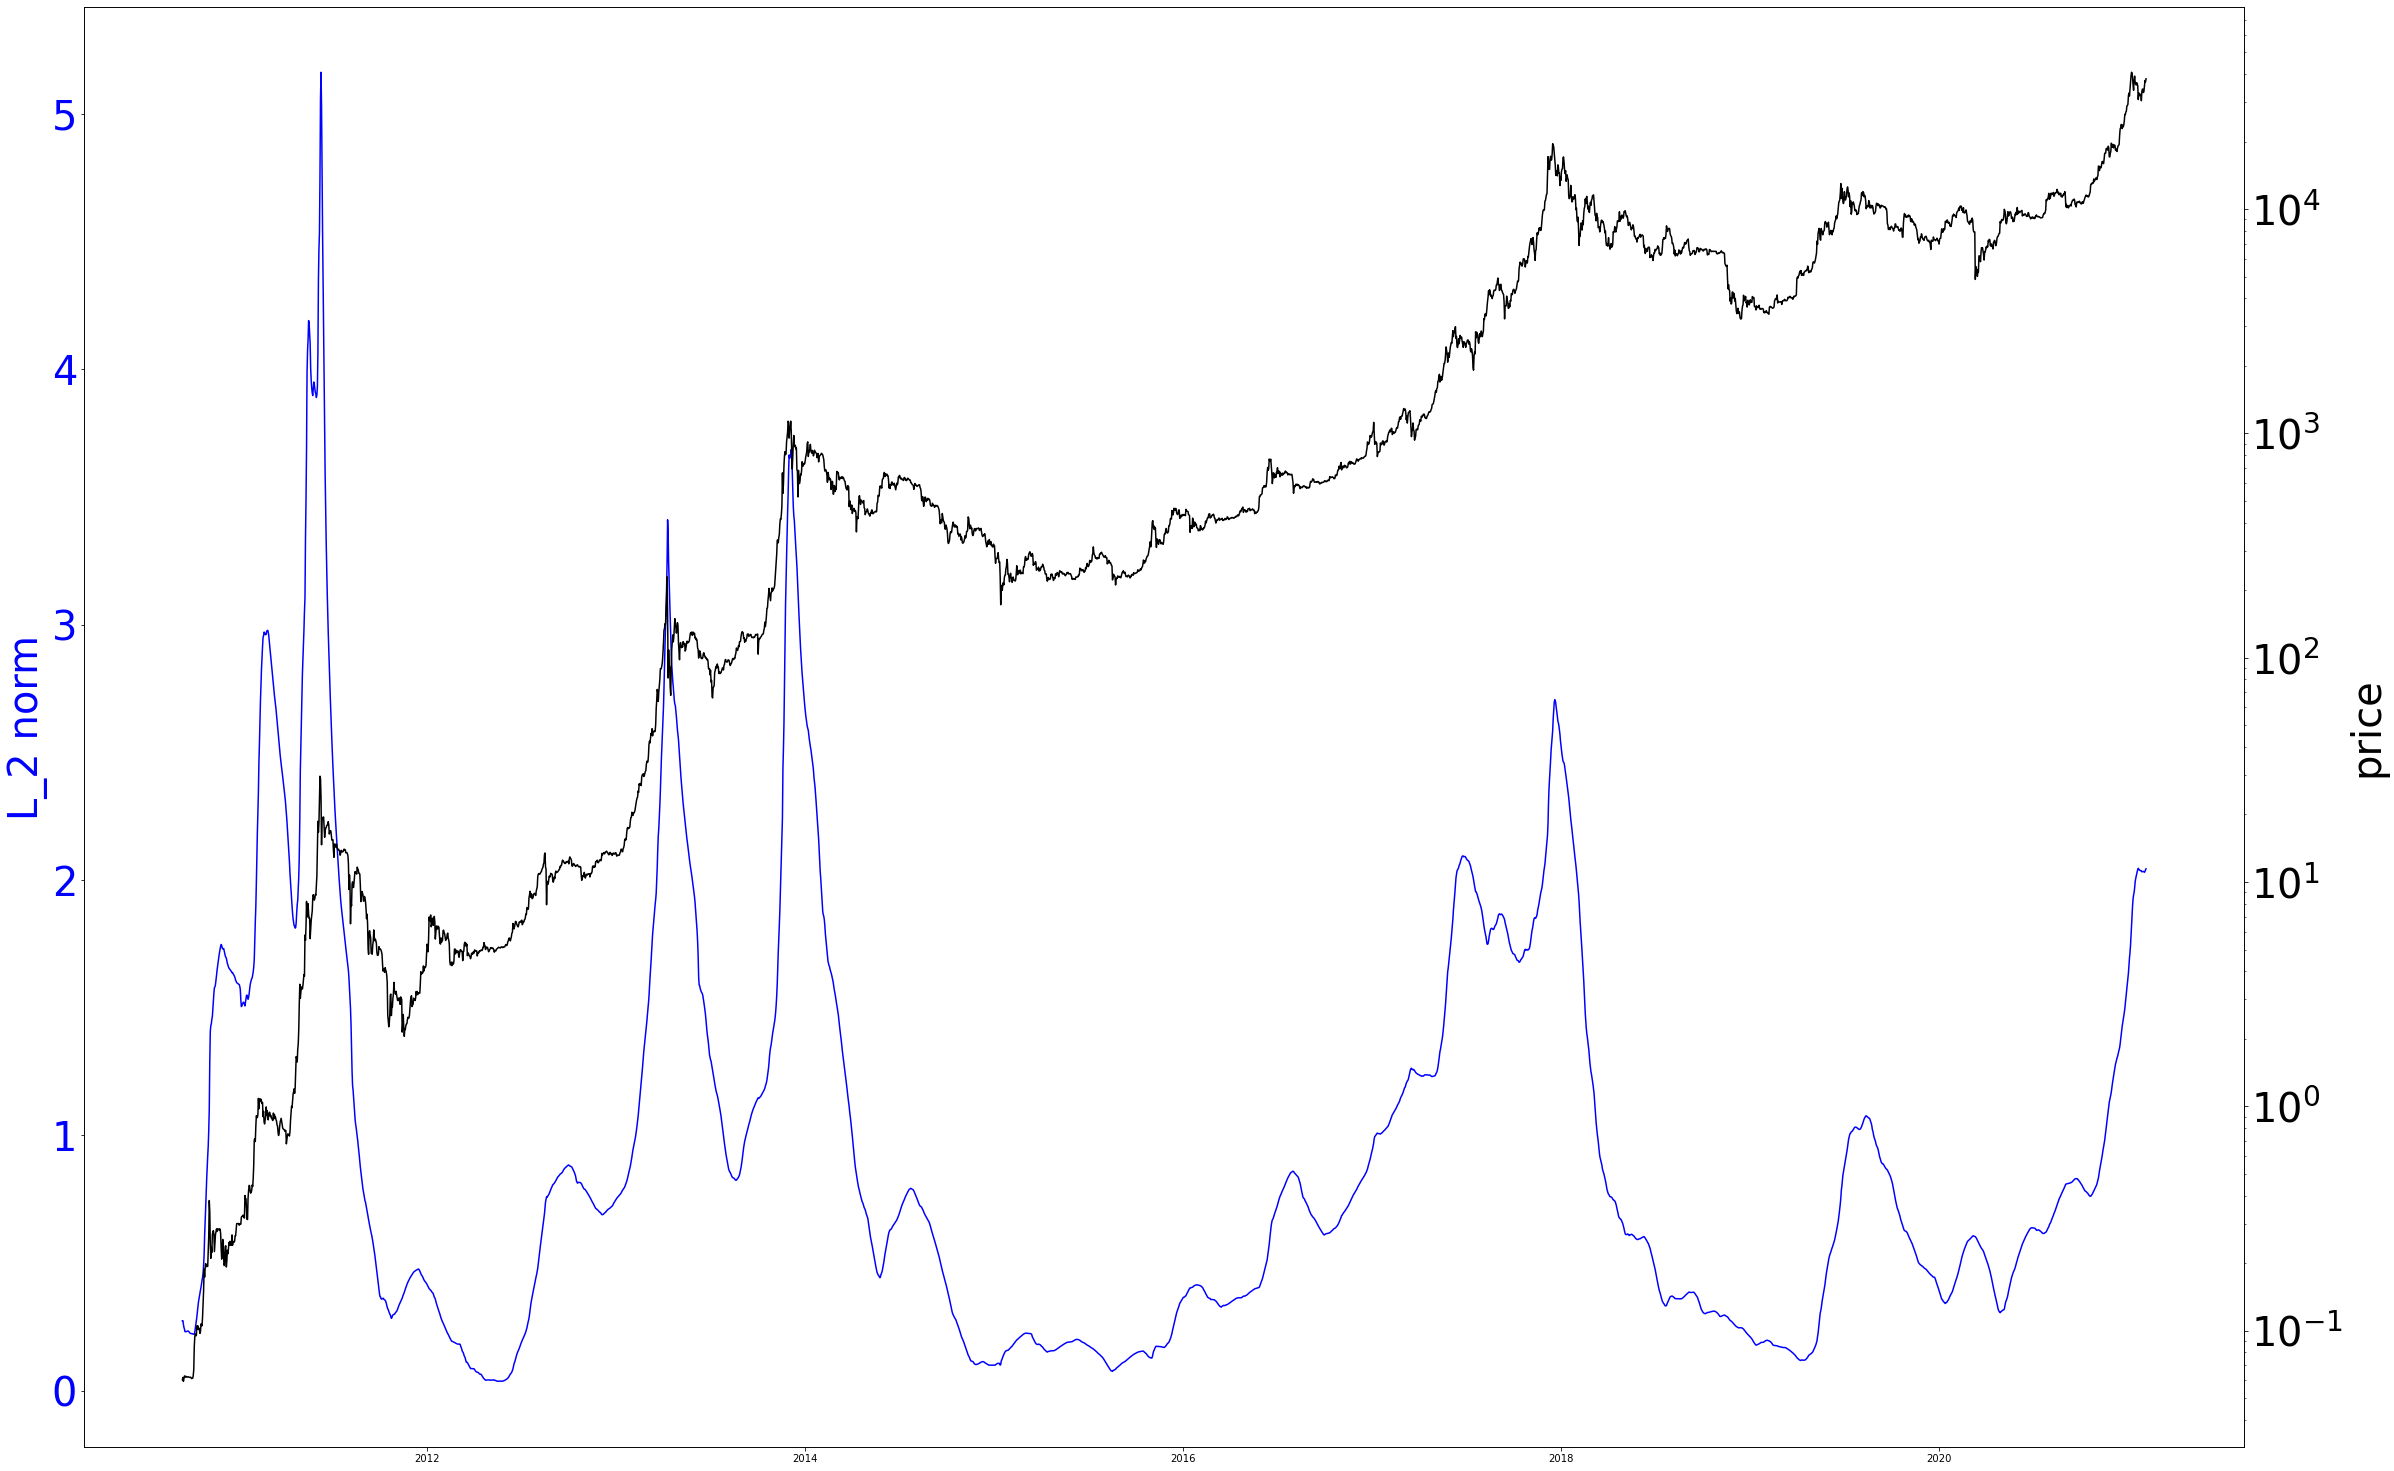

In [4]:
df = g.get_price_realized_price()
market_to_realized_cap_moving_L_k_norm(df)